# R

**TIPS**

- **Data wrangling** - tidying and transforming (e.g. selecting only bits of interest and calculating summary statistics)
- Two types of data analysis:
    - **Visualisation** (mainly data exploration - when you observe more than once) 
    - **Modelling** (mainly hypothesis confirmation)
- `data.table` - dataframe but for big data
- `tidyverse` - fundamental packages for reproducable code and are designed to work together. Update using `tidyverse_updata()`
- **CRAN** - network of mirror serversto distribute R and R packages
- `::` is the same as `.` in Python - so you can do `package::function()`
- **reprex** - reproducable example - use this for asking questions online. You need to include:
    - **Packages** - make sure you're using the latest version first
    - **Data** - use `dput()` to generate the R code to recreate it
    - **Code** - keep it concise and use comments
- `?function_name` - open the help page for a function
- If there is a `+` in the console, it means R thinks you haven't finished. Press `escape` to to abort.
- `~` creates a formular which is a data type in R

In [62]:
options(repr.plot.width = 12, repr.plot.height = 8)
suppressMessages(library(tidyverse))

## Explore

### Visualisation

We will do this using `ggplot2`, a member of the tidyverse, which implements the **grammar of graphics**. First, we need to create a ggplot object using the `ggplot()` function. This initialises the canvas and associates the data frame with it. We can then add layers to this canvas. Arguments for this function are:
- `data` - the dataframe with your data
- `mapping` - list of aesthetic mappings, inside `aes()`, to use for the plot. This is optional and can be added at the layer level. You can also use this for:

Any arguments inside the `ggplot()` function call are inherited by the rest of the layers in the plot.

We can then add a layer to state what type of graph we want. We can do this by adding a `+` at the end of the line (not the beginning).

For example, we can make a **scatter plot** using `geom_point()`. Aesthetics  for this are:
- `x` and `y` - state the x and y variables
- `colour` - change the colour of points - this is useful for adding a third dimension to your data this can be used for all types of data
- `shape` - change the shape of points - this is useful for adding a third dimension to your data for categorical variables
- `size` - change size of points - this is useful for adding a third dimension to your data for ordered or continuous variables
- `alpha` - change the trasparency of points
- `fill` - change the fill colour of a point
- `group` - overrides default grouping
- `stroke` - change the point size

In [63]:
# Load in the mpg dataset that comes with ggplot2

mpg <- ggplot2::mpg

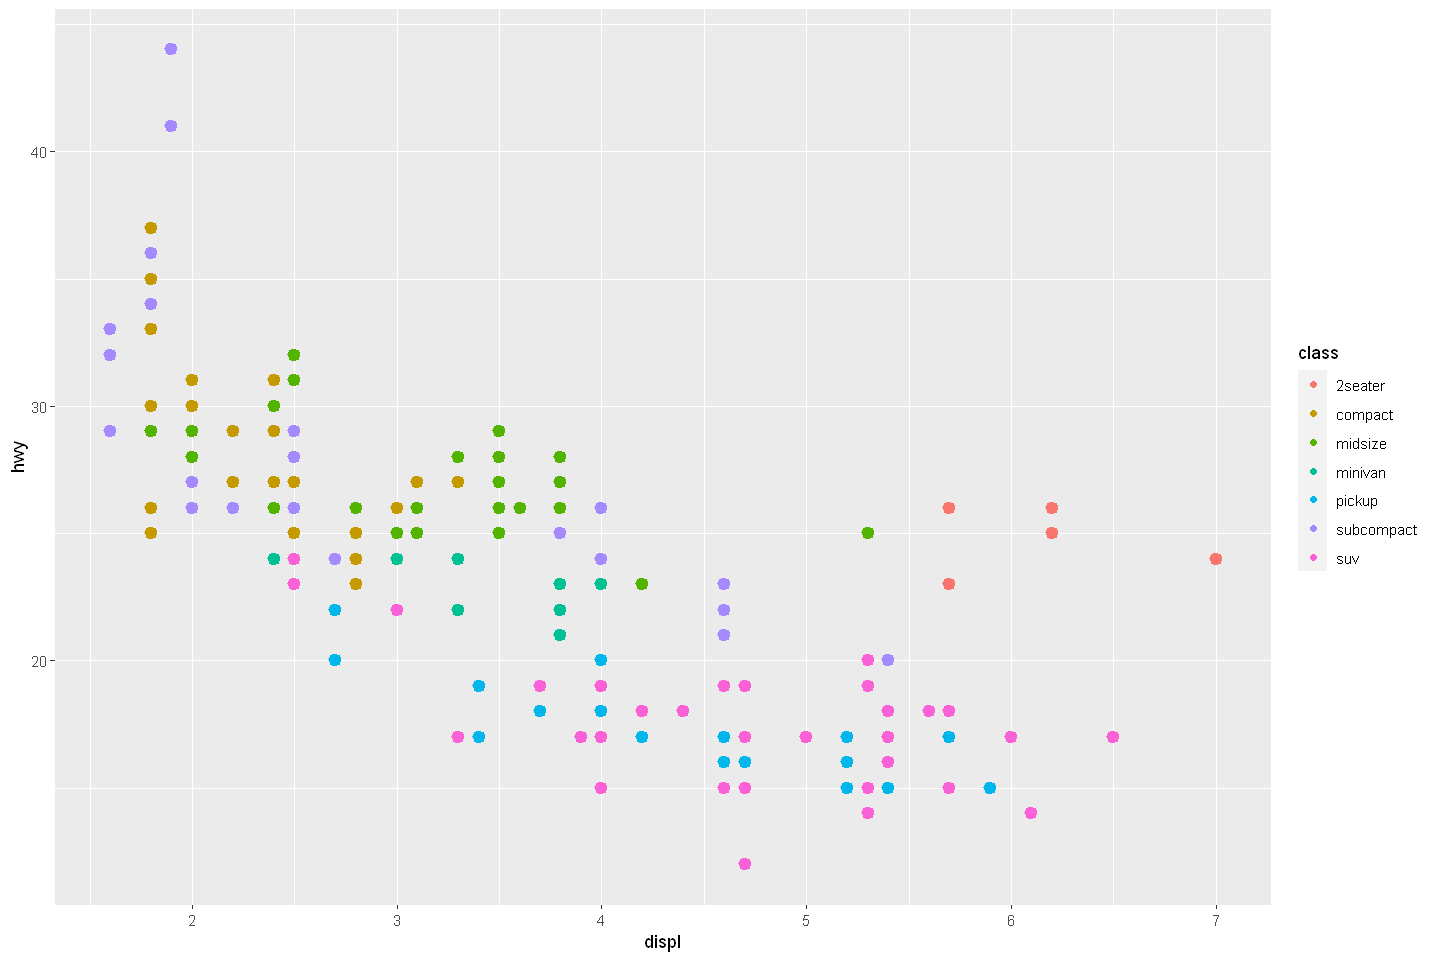

In [64]:
# Make a scatter plot of engine displacement (displ) vs highway miles per gallon (hwy)

ggplot(mpg, aes(x = displ, y = hwy, colour = class, stroke = 2)) +
        geom_point()

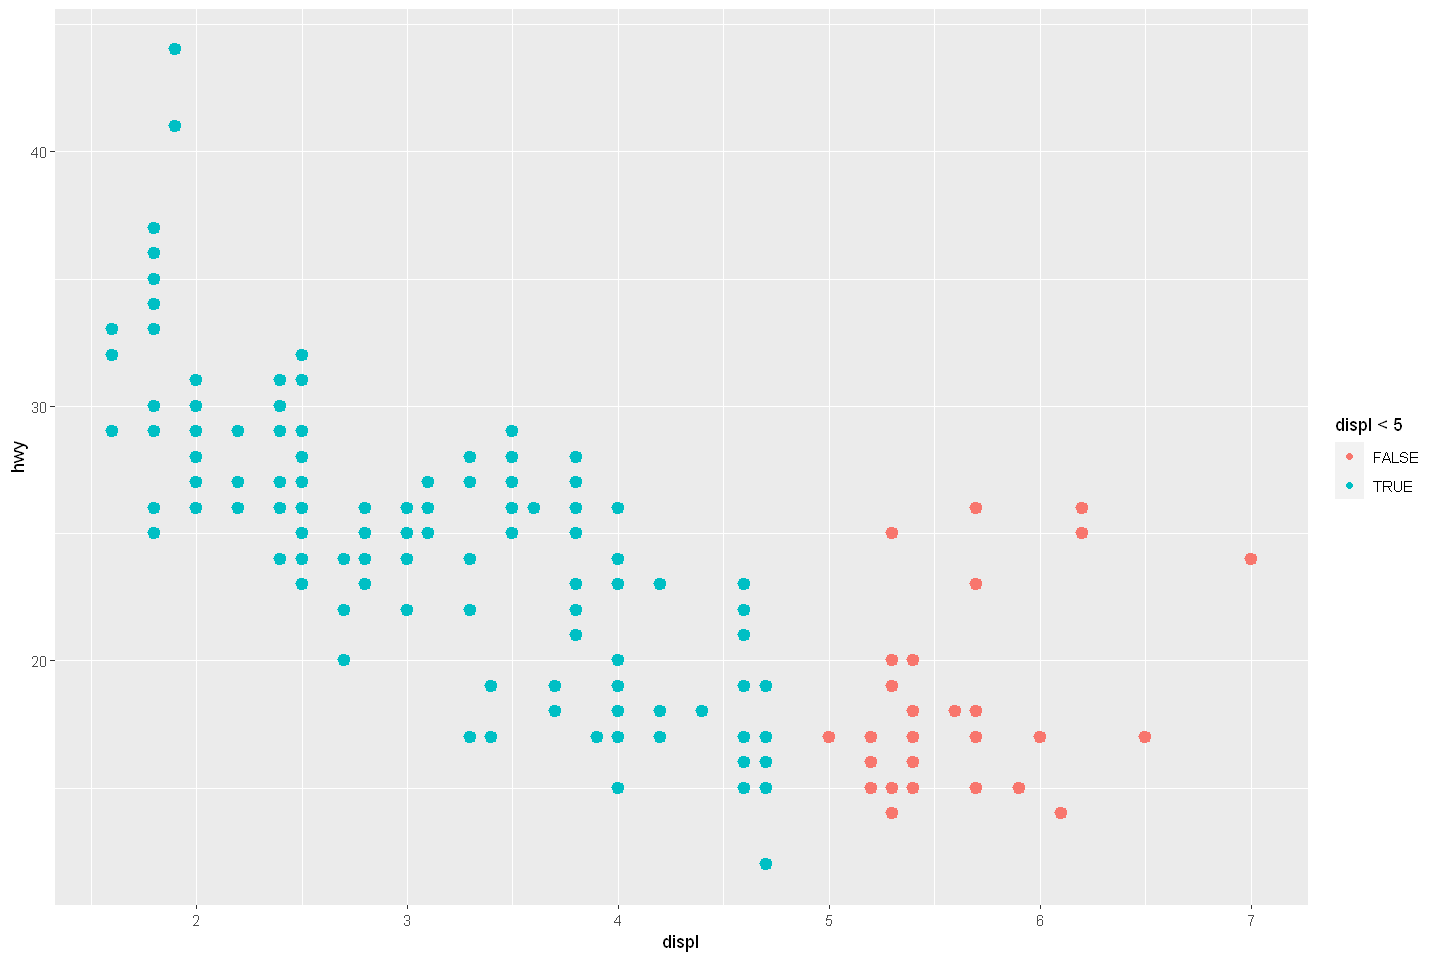

In [65]:
ggplot(mpg, aes(x = displ, y = hwy, colour = displ < 5, stroke = 2)) +
        geom_point()

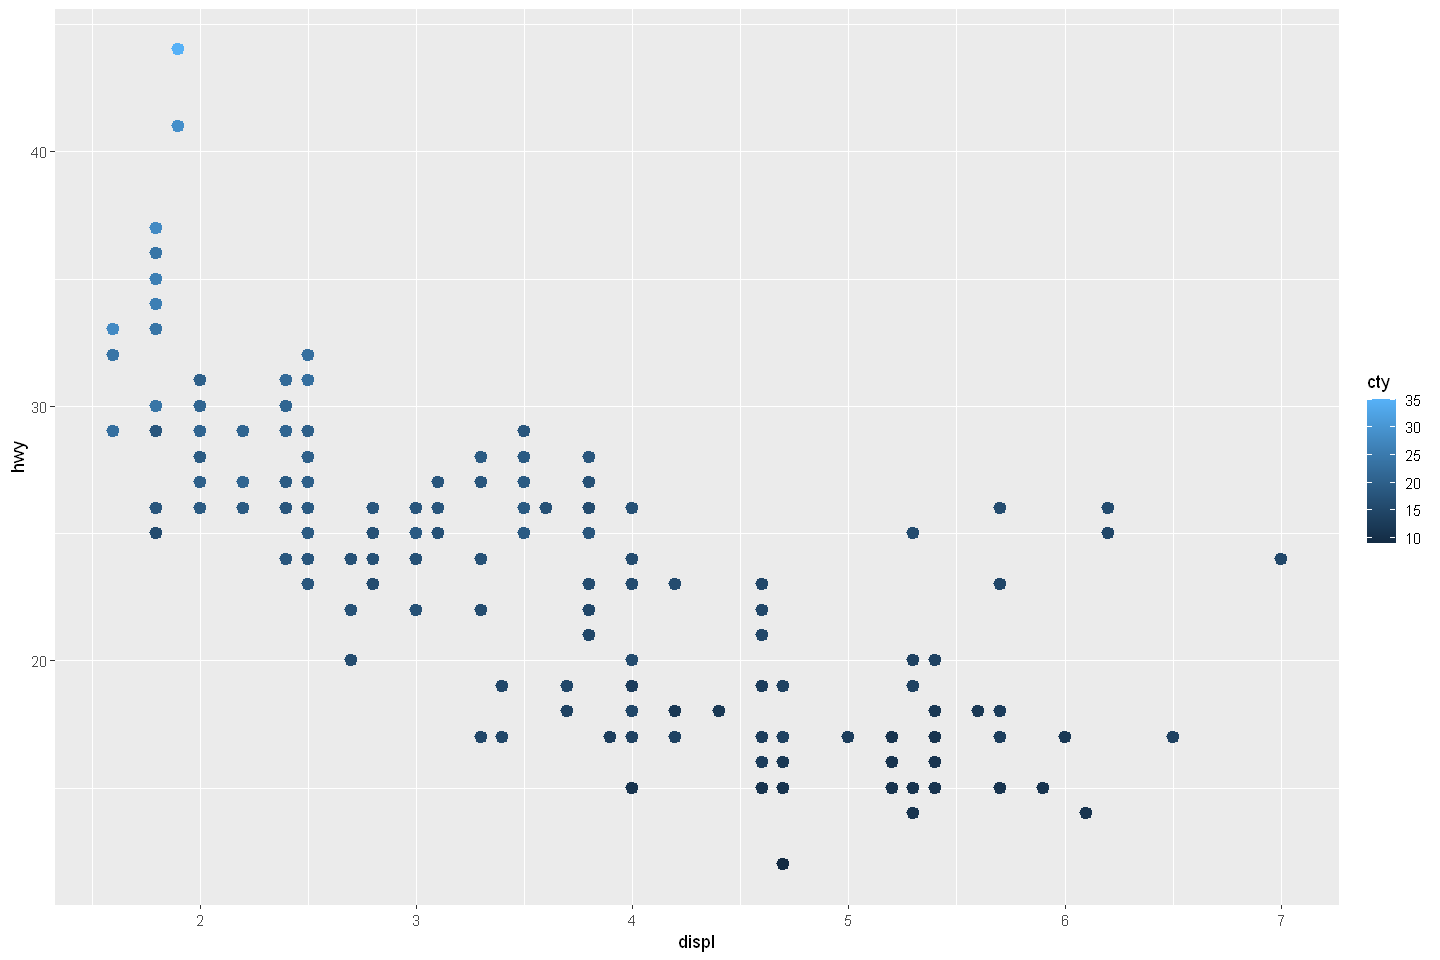

In [66]:
ggplot(mpg, aes(x = displ, y = hwy, colour = cty, stroke = 2)) +
        geom_point()

We can also view more than one plot at once. This is useful for categorical variables. To do this by splitting the plot into **facets** using `facet_wrap()`. This has these arguments:
- `facets` - use `~` followed by a discrete variable (or an expressions quoted by `vars()`) to create a formula
- `nrow` - the number of rows
- `ncol` - the number of columns
- `scales` - whether the scales are the same for all - `fixed` (default), `free`, `free_x` and `free_y`
- `shrink` - if `TRUE`, will shrink scales to fit output statistics not raw data
- `labeller` - facet labels, taes a dataframe of labels
- `as.table` - if `TRUE` (default), the facets are laid out like a table with the highest values at the bottom right. If `FALSE`, facets are laid out like a plot with the highest value at the top right.
- `switch` - change where the labels are. default - top and right. `"x"` (top at bottom), `"y"` (right at left) and `"both"`.
- `drop` - if `TRUE` (default), all factor levels not used are dropped
- `dir` - direction - `"h"` (horizonal) and `"v"` (vertical).
- `strip.position` - change placement of labels `c("top",  "bottom", "left", "right")`

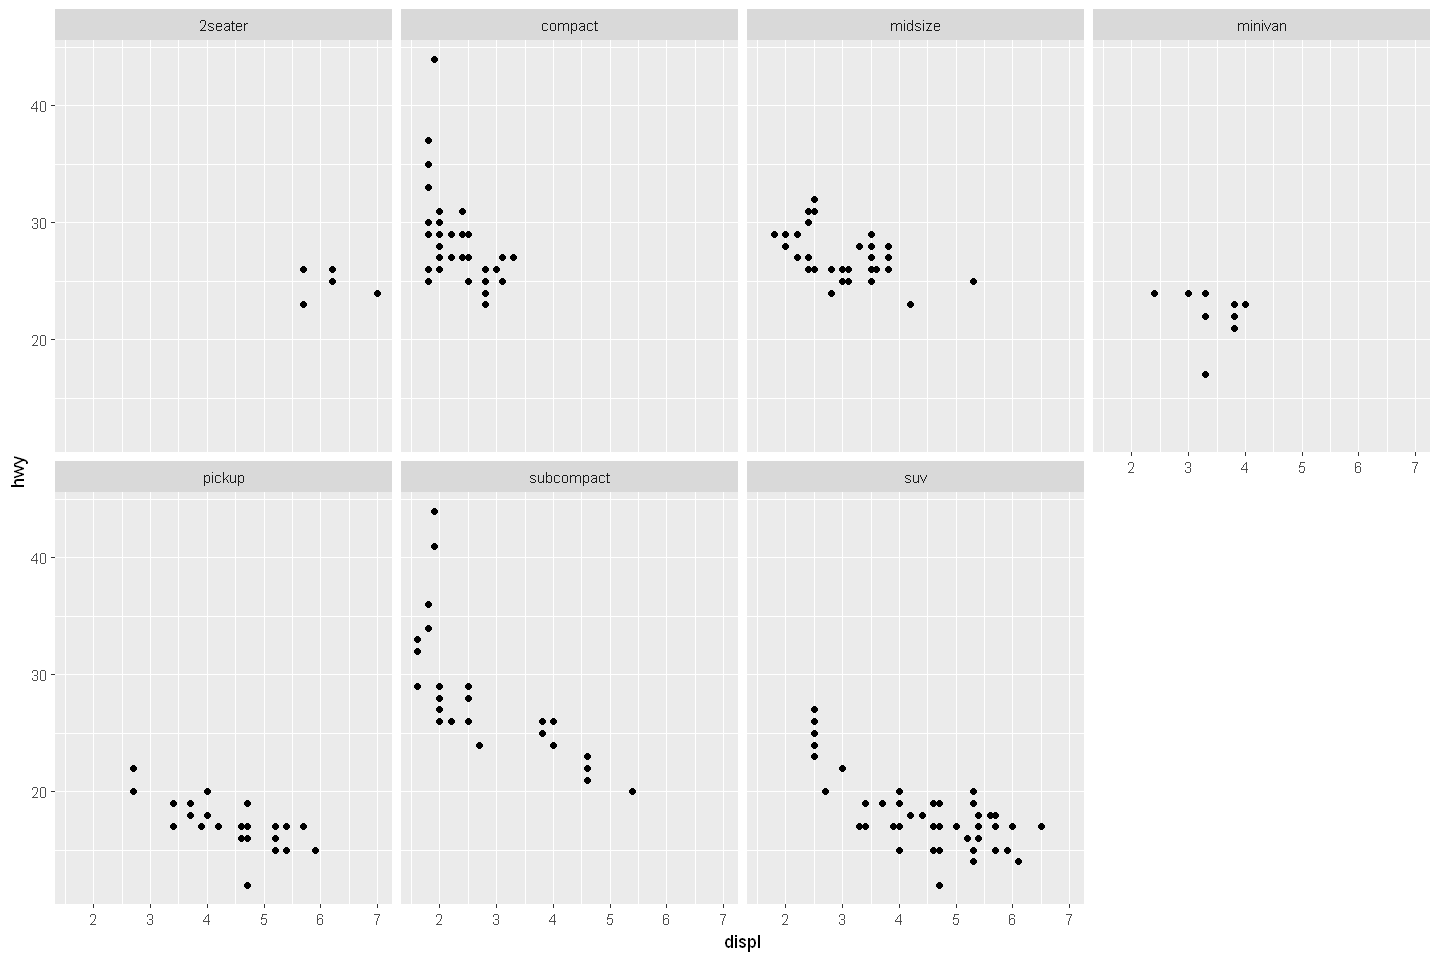

In [67]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

You can also do this for two variables using `facet_grid()` using `variable ~ variable`. You should usually put the variable with more unique levels in the columns. This has one extra argument:
- `margins` - `FALSE` removes margins. Character vector renames margins.

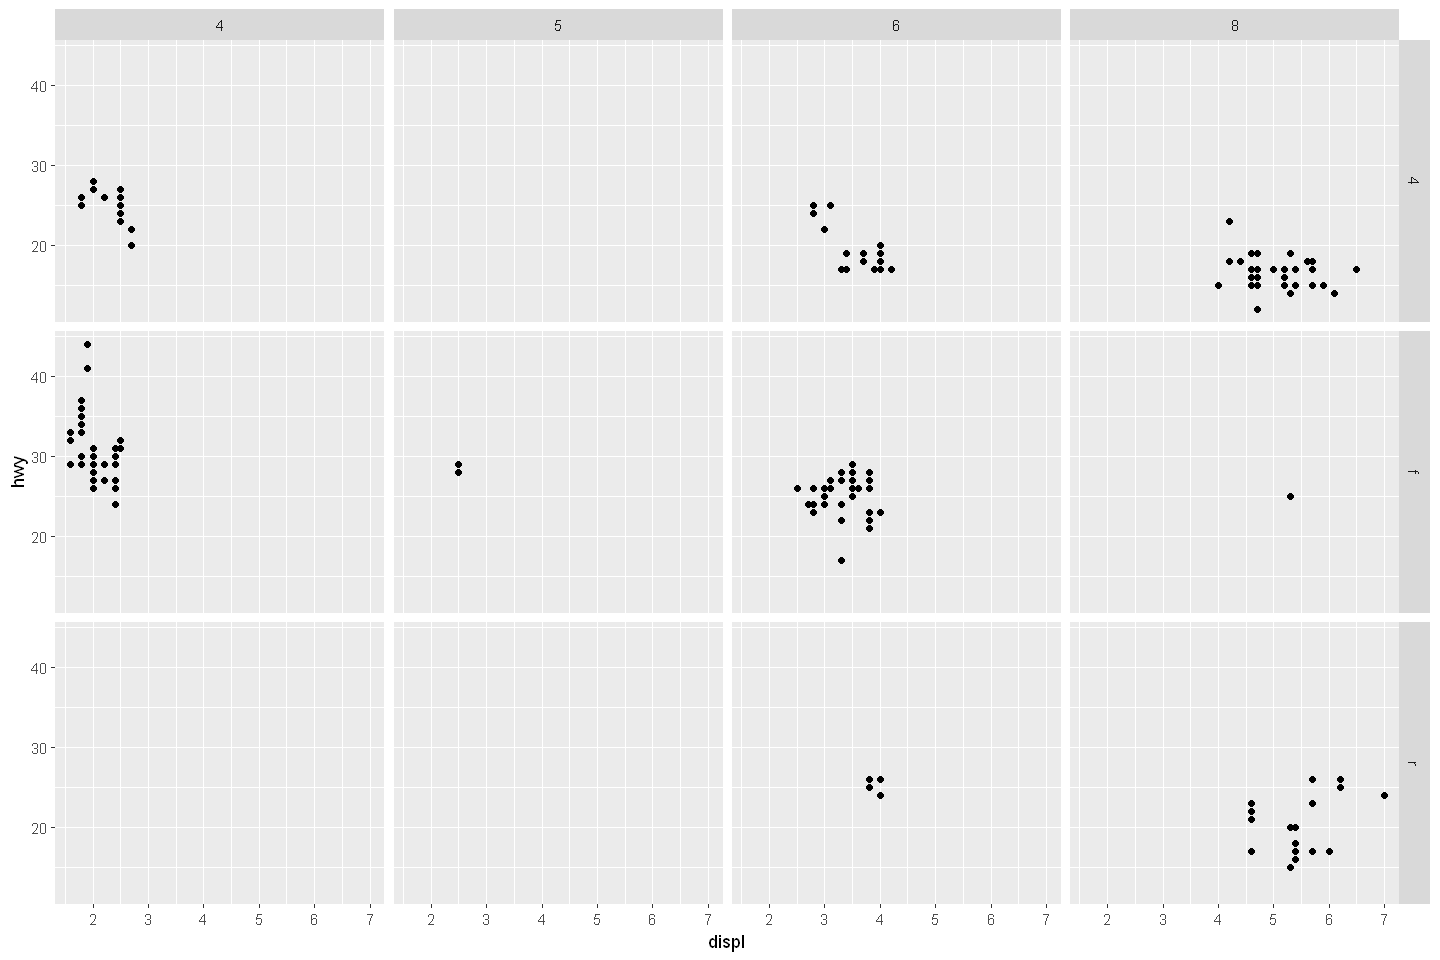

In [69]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)